## **Data Preparation**

In [1]:
# generating data on our own ::::
# using function make_regression to generate dummy datasets'

import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
# For visualising data points

**STEP - 1 :: Generate Data**

In [2]:
X, y = make_regression()
print(X.shape, y.shape)

(100, 100) (100,)


In [3]:
# If you want only 10 features

X, y = make_regression(n_samples = 500, n_features = 10, n_informative = 5, noise = 25.8, random_state = 0)
#random_state: It is an optional parameter that allows you to set a seed for reproducibility.
# If you use the same random_state value in the future, you should get the same dataset.
print(X.shape, y.shape)

n_features = X.shape[1]

(500, 10) (500,)


In [4]:
print(X)

[[ 1.70646825e+00  1.51163935e+00 -4.17326413e-04 ... -4.61893815e-01
  -6.26490223e-01 -7.99593500e-01]
 [-1.61695604e+00  6.40131526e-01 -3.69181838e-01 ...  2.79924599e-01
  -9.81503896e-02  6.55263731e-01]
 [ 9.39532294e-02 -1.30106954e-01  9.29505111e-01 ... -5.69312053e-01
   2.69904355e-01  1.23721914e-01]
 ...
 [-1.79132755e+00 -3.65055217e-01 -4.99016638e-01 ... -1.63242330e+00
  -6.71341546e-02  1.92753849e-01]
 [-3.60084119e-01 -1.12684086e+00  6.24447319e-01 ... -9.56580009e-01
   5.97939206e-01  1.61479638e+00]
 [-5.41678349e-01  1.33179885e-01  8.13937910e-01 ...  1.18210209e+00
  -1.57065459e+00  7.96560724e-01]]


In [5]:
# How Data Looks like

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090


**STEP - 2:: Normalise**

In [6]:
X.mean()

# This is MEAN of all the points but it's not mean of Particular Row & Coloumn

-0.014726047025784055

In [7]:
# It might be possible that this columnn may contain String,m Number too...
# So taking mean of particular / Singulkar Column

X.mean(axis = 0)

array([-0.02995589, -0.07127637, -0.09357268,  0.04844928, -0.03183627,
        0.01762592, -0.0091391 ,  0.00855508,  0.06286967, -0.04898012])

In [8]:
X.mean(axis = 0).shape

(10,)

**Axis = 0 --> This means that you are calculating the mean along the columns.**

Here's what each part does:

**X:** This is your feature matrix with 500 samples and 10 features.

**mean(axis=0):** This calculates the mean along axis 0, which is the mean along each column. The result is a 1D NumPy array containing the mean values for each of the 10 features.

So, after running **X.mean(axis=0)**, you will obtain an array of length 10, where each element represents the mean value of the corresponding feature across all 500 samples.

In [9]:
X.mean(axis =1)

array([ 2.88848840e-01, -4.11045031e-02, -2.59134396e-01, -3.14543865e-01,
        3.40276241e-01,  6.68542383e-01,  3.21360658e-01,  8.00323705e-02,
       -6.93115434e-01,  6.86520366e-01, -3.25968965e-01, -3.61414896e-01,
       -6.94323721e-02, -2.73619335e-01, -1.41039958e-01, -6.29737314e-01,
       -3.69323105e-01, -5.86811603e-02, -6.85688173e-02, -3.06994721e-01,
       -4.22446100e-02, -1.71229860e-01, -8.17239902e-02,  3.33083221e-01,
        1.63953611e-01, -5.83398220e-02, -1.87197810e-01, -1.53540532e-01,
       -2.37045330e-01,  7.38023171e-01, -3.28316220e-03,  5.96530621e-02,
        5.30365174e-01, -3.50894120e-01, -2.65271434e-01, -2.35074498e-01,
       -3.45893128e-01,  1.04738507e-01,  1.37204348e-01, -3.52536108e-01,
       -2.77245349e-01,  4.97568448e-01, -1.57848751e-02,  4.66211724e-01,
       -1.69625569e-01, -4.34762842e-01,  1.89900156e-01,  3.36302366e-01,
       -6.26751941e-01,  4.61063164e-01, -5.80266726e-01, -2.79623005e-01,
        4.45410550e-01,  

In [10]:
def normalise(X):
  u = X.mean(axis =0)
  std = X.std(axis =0)

  return (X- u) / std

In [11]:
X = normalise(X)
pd.DataFrame(X).head()
#This will give How Normalised Data Looks like

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [12]:


X.mean( axis = 0)

array([-2.75335310e-17,  5.82867088e-17, -1.06581410e-17, -1.39888101e-17,
        2.49800181e-18,  4.28546088e-17,  1.43635104e-17,  1.46549439e-17,
        7.14983628e-17, -1.07691633e-16])

In [13]:
X.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Visualize y as a function of each feature**

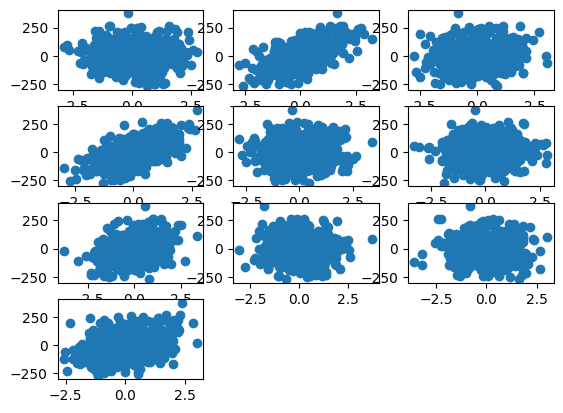

In [14]:
# I want to plot only all feature in subplot

for f in range(0, 10):
  #for every feature in range == 10 features
  plt.subplot(4,3,f+1)
  plt.scatter(X[:, f], y)

plt.show()




**STEP - 4 :: Split The Data into test & Train**

**This time we will do traiN nand Test Split using SKLERAN [ TRAIUN 9 TEST SPLIT]**

In [15]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False, random_state = 0)

In [20]:
X_train.shape

(350, 10)

In [21]:
y_train.shape

(150, 10)

In [22]:
X_test.shape

(350,)

In [23]:
y_test.shape

(150,)



## **Hypothesis // Modelling**

In [24]:
from sklearn.model_selection import train_test_split

# Assuming preprocess is defined
def preprocess(X):
    if X.shape[1] == n_features:

    # This Code is written because Sometimes we add Rum more than one times.
    # It means Dummy Column may get added more than once. To Avoid the same it is written
    # IT MEANS IF I HAVE 10 FEATURES THAN ONLY DUMMY COLUMN WOULD GET ADDED

        # add a Coloumn of 1's as Oth Column
        m = X.shape[0]
        ones = np.ones((m, 1))

        # I want m rows and 1 coloumn and all the colomn will contain value as **1**
        # NOW ADDING THE COLUMN TO X
        X = np.hstack((ones, X))  #   # Hstack -->> Horizontally
    return X

# Assuming X and y are your original data
# Also assuming n_features is defined somewhere in your code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the training and testing sets
X_train = preprocess(X_train)
X_test = preprocess(X_test)

# Print the shapes of the preprocessed datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (350, 11)
X_test shape: (150, 11)


In [25]:
def hypothesis(X, theta):
  return np.dot(X, theta)

In [26]:
def loss(X, y, theta):
  y_pred = hypothesis(X, theta)
  error = np.sum((y - y_pred)**2)
  return error

In [27]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [28]:
X_train = preprocess(X_train)
pd.DataFrame(X_train).head()

# We have 11 Column

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.846030,-0.196316,1.974867,0.899303,-0.120924,1.012577,-0.858283,0.593479,0.886169,1.988137
1,1.0,1.266926,-0.423631,1.494501,-1.771979,2.028854,-0.388102,-0.146958,1.024823,0.915690,0.116749
2,1.0,1.370568,-2.082429,-0.911617,-0.826938,-0.211031,-0.279848,-0.560405,-1.066258,-0.182625,0.532808
3,1.0,0.222313,-1.861104,-1.102958,-0.582270,0.118062,0.551439,-0.591445,-0.313087,0.035609,-0.003640
4,1.0,-0.103277,0.715994,-1.187923,1.555458,1.230527,-0.210213,-0.026827,0.997693,-1.892401,0.852313


In [29]:
X_test = preprocess(X_test)
print(X_test.shape, X_train.shape)

(150, 11) (350, 11)


## **Computing Gradient Descent**

In [30]:
def gradient(X, y, theta):
  y_pred = hypothesis(X, theta)
  grad = np.dot(X.T, (y_pred - y))
  m = X.shape[0]
  return grad/m


  """
  The expression m = X.shape[0] is commonly used in programming, particularly in the context of machine learning and data analysis.
X is a variable, presumably representing some data or a matrix.
X.shape is likely a method or attribute that returns the shape of the matrix or array X.
In many programming languages and libraries like NumPy, the shape attribute of an array provides a
tuple representing the dimensions of the array.
X.shape[0] extracts the first element of the shape tuple. In the context of matrices,
the first element usually corresponds to the number of rows.
So, m = X.shape[0] assigns the number of rows in the matrix or the size of the first dimension to the variable m.
This is often done to store the number of training examples in machine learning or the number of data points in
a dataset.

For example, if X is a matrix with 100 rows and 10 columns,
then after executing m = X.shape[0], the variable m would be assigned the value 100.
"""

## **Traing The Model**

In [31]:
def train(X, y, learning_rate = 0.1, max_iterations = 100):
  n = X.shape[1]
  theta = np.random.randn(n)

  #  Plotting error can also help
  error_list = [ ]
  for i in range (max_iterations):
    error = loss(X, y, theta)
    error_list.append(error)
    grad = gradient(X, y, theta)
    theta = theta - learning_rate * grad

  plt.plot(error_list)
  return theta


**X.shape**  --> Gives you (500, 10) --> 500 Rows and 10 Columns

**X.shape[1]** --> Gives you (100 -->> 10 Coloumns

[-4.37336565  0.74003637 62.16815047  9.67795852 66.06941837  0.29565968
 -0.43051759 42.09727289 -0.78323821  1.43740447 23.61853931]


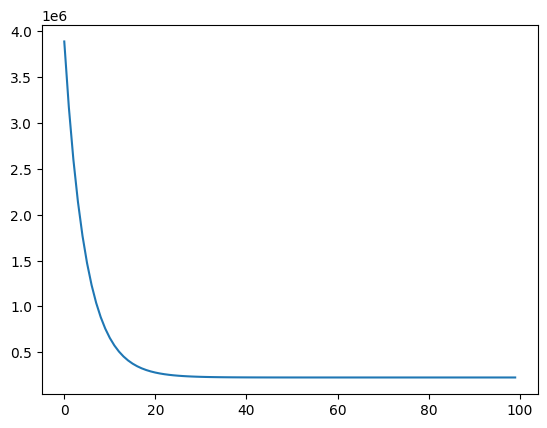

In [32]:
theta = train(X_train, y_train)
print(theta)

**How Accurate our Predictions are ::::**

## **R 2 SCORE**

In [33]:
# EVALUATION

def r2score(y, y_pred):
  y_mean = y.mean()
  #ymean is avg. of y
  numerator = np.sum((y-y_pred)**2)
  denominator = np.sum((y - y_mean)**2)
  return 1 - (numerator / denominator)

In [35]:
# Y Predicted for the test Data

y_pred = hypothesis(X_test, theta)

In [39]:
r2score(y_test, y_pred)

0.9253069824589426

**If you reduce the noise in Data R2 Score may improve**